<a href="https://colab.research.google.com/github/nikhil-xyz/ImageClassification/blob/main/CFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
import matplotlib.pyplot as plt


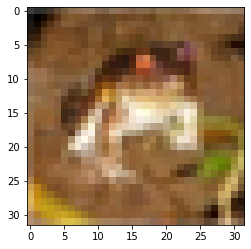

In [7]:
plt.imshow(x_train[0])

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
from tensorflow.keras import models

In [10]:
cnn = models.Sequential([
    keras.layers.Conv2D(40, (3, 3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(80, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(40, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [11]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
cnn.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 97s 62ms/step - loss: 0.7725 - accuracy: 0.7278
Epoch 2/20
1563/1563 [==============================] - 93s 59ms/step - loss: 0.7481 - accuracy: 0.7378
Epoch 3/20
1563/1563 [==============================] - 92s 59ms/step - loss: 0.7253 - accuracy: 0.7449
Epoch 4/20
1563/1563 [==============================] - 93s 60ms/step - loss: 0.7005 - accuracy: 0.7540
Epoch 5/20
1563/1563 [==============================] - 93s 60ms/step - loss: 0.6795 - accuracy: 0.7600
Epoch 6/20
1563/1563 [==============================] - 97s 62ms/step - loss: 0.6608 - accuracy: 0.7667
Epoch 7/20
1563/1563 [==============================] - 93s 60ms/step - loss: 0.6460 - accuracy: 0.7723
Epoch 8/20
1563/1563 [==============================] - 94s 60ms/step - loss: 0.6280 - accuracy: 0.7783
Epoch 9/20
1563/1563 [==============================] - 95s 60ms/step - loss: 0.6107 - accuracy: 0.7858
Epoch 10/20
1563/1563 [==============================] - 97s 62m

In [14]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.9990 - accuracy: 0.7054


[0.9990406036376953, 0.7053999900817871]

In [17]:
import numpy as np

In [18]:
y_predicted = cnn.predict(x_test)
y_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_labels)

313/313 [==============================] - 6s 18ms/step


In [16]:
import seaborn as sns

Text(87.0, 0.5, 'True')

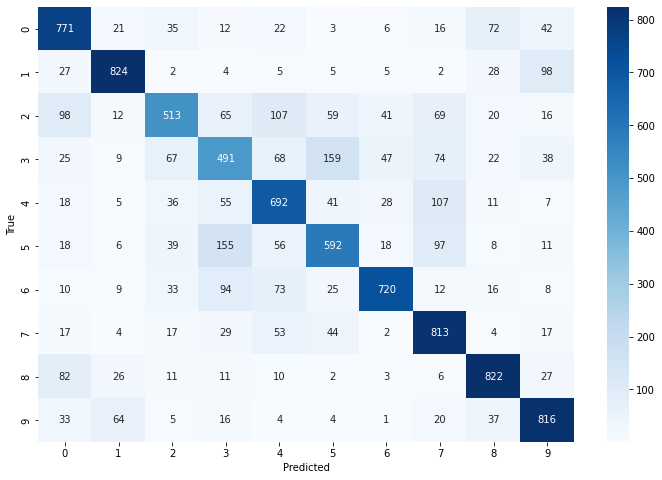

In [19]:
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')